In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# Step 1: Prepare data
df = pd.read_csv('EDA_output.csv')  # Uncomment if loading from file

In [37]:
df

,index,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,order_hour,year,month,day,weekday,week,is_weekend
0,0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,11,2015,1,1,Thursday,1,False
1,1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,11,2015,1,1,Thursday,1,False
2,2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,11,2015,1,1,Thursday,1,False
3,3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,11,2015,1,1,Thursday,1,False
4,4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,11,2015,1,1,Thursday,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,21,2015,12,31,Thursday,53,False
48616,48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,21,2015,12,31,Thursday,53,False
48617,48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,21,2015,12,31,Thursday,53,False
48618,48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,22,2015,12,31,Thursday,53,False


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# Step 1: Prepare data
df = pd.read_excel('cleaned_1.xlsx')  # Uncomment if loading from file

df_daily = df.groupby('order_date')['total_price'].sum().reset_index()
df_daily.columns = ['ds', 'y']  # Prophet requires 'ds' and 'y' columns

# Step 2: Split into train and test
forecast_days = 7  # Change to 30 for a 1-month forecast
train = df_daily[:-forecast_days]
test = df_daily[-forecast_days:].copy()

# Step 3: Fit the model
model = Prophet()
model.fit(train)

# Step 4: Forecast
future = model.make_future_dataframe(periods=len(test), freq='D')
forecast = model.predict(future)

# Step 5: Align forecast with test dates
forecast.set_index('ds', inplace=True)
test.set_index('ds', inplace=True)
predicted = forecast.reindex(test.index)

# Step 6: Calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_value = mape(test['y'], predicted['yhat'])
print(f'MAPE: {mape_value:.2f}%')



17:04:55 - cmdstanpy - INFO - Chain [1] start processing
17:04:55 - cmdstanpy - INFO - Chain [1] done processing


MAPE: 19.98%


In [39]:
# Convert date columns to datetime
train['ds'] = pd.to_datetime(train['ds'], format='%Y-%m-%d')
test.index = pd.to_datetime(test.index, format='%Y-%m-%d')
predicted.index = pd.to_datetime(predicted.index, format='%Y-%m-%d')


ValueError: time data "13-01-2015" doesn't match format "%Y-%m-%d", at position 142. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

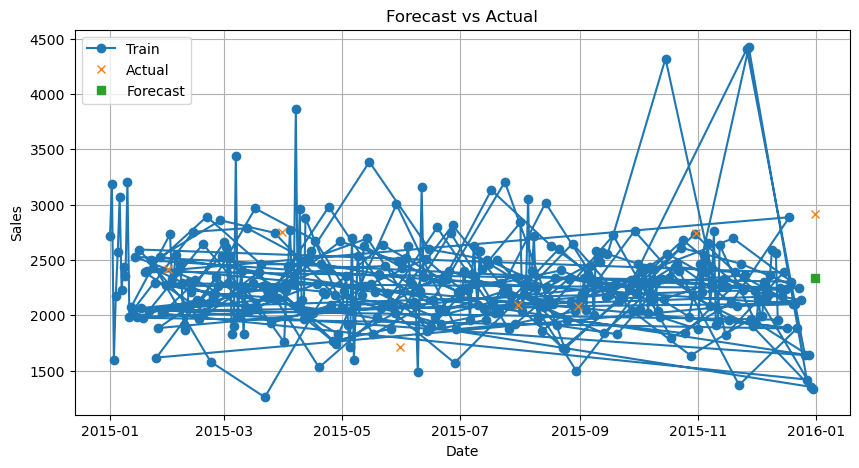

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(train['ds'], train['y'], marker='o', linestyle='-', label='Train')        # line with circles
plt.plot(test.index, test['y'], marker='x', linestyle='None', label='Actual')      # cross markers
plt.plot(predicted.index, predicted['yhat'], marker='s', linestyle='None', label='Forecast')  # square markers
plt.legend()
plt.title("Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

plt.show()


ConversionError: Failed to convert value(s) to axis units: array([datetime.datetime(2015, 1, 1, 0, 0),
       datetime.datetime(2015, 1, 2, 0, 0),
       datetime.datetime(2015, 1, 3, 0, 0),
       datetime.datetime(2015, 1, 4, 0, 0),
       datetime.datetime(2015, 1, 5, 0, 0),
       datetime.datetime(2015, 1, 6, 0, 0),
       datetime.datetime(2015, 1, 7, 0, 0),
       datetime.datetime(2015, 1, 8, 0, 0),
       datetime.datetime(2015, 1, 9, 0, 0),
       datetime.datetime(2015, 1, 10, 0, 0),
       datetime.datetime(2015, 1, 11, 0, 0),
       datetime.datetime(2015, 1, 12, 0, 0),
       datetime.datetime(2015, 2, 1, 0, 0),
       datetime.datetime(2015, 2, 2, 0, 0),
       datetime.datetime(2015, 2, 3, 0, 0),
       datetime.datetime(2015, 2, 4, 0, 0),
       datetime.datetime(2015, 2, 5, 0, 0),
       datetime.datetime(2015, 2, 6, 0, 0),
       datetime.datetime(2015, 2, 7, 0, 0),
       datetime.datetime(2015, 2, 8, 0, 0),
       datetime.datetime(2015, 2, 9, 0, 0),
       datetime.datetime(2015, 2, 10, 0, 0),
       datetime.datetime(2015, 2, 11, 0, 0),
       datetime.datetime(2015, 2, 12, 0, 0),
       datetime.datetime(2015, 3, 1, 0, 0),
       datetime.datetime(2015, 3, 2, 0, 0),
       datetime.datetime(2015, 3, 3, 0, 0),
       datetime.datetime(2015, 3, 4, 0, 0),
       datetime.datetime(2015, 3, 5, 0, 0),
       datetime.datetime(2015, 3, 6, 0, 0),
       datetime.datetime(2015, 3, 7, 0, 0),
       datetime.datetime(2015, 3, 8, 0, 0),
       datetime.datetime(2015, 3, 9, 0, 0),
       datetime.datetime(2015, 3, 10, 0, 0),
       datetime.datetime(2015, 3, 11, 0, 0),
       datetime.datetime(2015, 3, 12, 0, 0),
       datetime.datetime(2015, 4, 1, 0, 0),
       datetime.datetime(2015, 4, 2, 0, 0),
       datetime.datetime(2015, 4, 3, 0, 0),
       datetime.datetime(2015, 4, 4, 0, 0),
       datetime.datetime(2015, 4, 5, 0, 0),
       datetime.datetime(2015, 4, 6, 0, 0),
       datetime.datetime(2015, 4, 7, 0, 0),
       datetime.datetime(2015, 4, 8, 0, 0),
       datetime.datetime(2015, 4, 9, 0, 0),
       datetime.datetime(2015, 4, 10, 0, 0),
       datetime.datetime(2015, 4, 11, 0, 0),
       datetime.datetime(2015, 4, 12, 0, 0),
       datetime.datetime(2015, 5, 1, 0, 0),
       datetime.datetime(2015, 5, 2, 0, 0),
       datetime.datetime(2015, 5, 3, 0, 0),
       datetime.datetime(2015, 5, 4, 0, 0),
       datetime.datetime(2015, 5, 5, 0, 0),
       datetime.datetime(2015, 5, 6, 0, 0),
       datetime.datetime(2015, 5, 7, 0, 0),
       datetime.datetime(2015, 5, 8, 0, 0),
       datetime.datetime(2015, 5, 9, 0, 0),
       datetime.datetime(2015, 5, 11, 0, 0),
       datetime.datetime(2015, 5, 12, 0, 0),
       datetime.datetime(2015, 6, 1, 0, 0),
       datetime.datetime(2015, 6, 2, 0, 0),
       datetime.datetime(2015, 6, 3, 0, 0),
       datetime.datetime(2015, 6, 4, 0, 0),
       datetime.datetime(2015, 6, 5, 0, 0),
       datetime.datetime(2015, 6, 6, 0, 0),
       datetime.datetime(2015, 6, 7, 0, 0),
       datetime.datetime(2015, 6, 8, 0, 0),
       datetime.datetime(2015, 6, 9, 0, 0),
       datetime.datetime(2015, 6, 10, 0, 0),
       datetime.datetime(2015, 6, 11, 0, 0),
       datetime.datetime(2015, 6, 12, 0, 0),
       datetime.datetime(2015, 7, 1, 0, 0),
       datetime.datetime(2015, 7, 2, 0, 0),
       datetime.datetime(2015, 7, 3, 0, 0),
       datetime.datetime(2015, 7, 4, 0, 0),
       datetime.datetime(2015, 7, 5, 0, 0),
       datetime.datetime(2015, 7, 6, 0, 0),
       datetime.datetime(2015, 7, 7, 0, 0),
       datetime.datetime(2015, 7, 8, 0, 0),
       datetime.datetime(2015, 7, 9, 0, 0),
       datetime.datetime(2015, 7, 10, 0, 0),
       datetime.datetime(2015, 7, 11, 0, 0),
       datetime.datetime(2015, 7, 12, 0, 0),
       datetime.datetime(2015, 8, 1, 0, 0),
       datetime.datetime(2015, 8, 2, 0, 0),
       datetime.datetime(2015, 8, 3, 0, 0),
       datetime.datetime(2015, 8, 4, 0, 0),
       datetime.datetime(2015, 8, 5, 0, 0),
       datetime.datetime(2015, 8, 6, 0, 0),
       datetime.datetime(2015, 8, 7, 0, 0),
       datetime.datetime(2015, 8, 8, 0, 0),
       datetime.datetime(2015, 8, 9, 0, 0),
       datetime.datetime(2015, 8, 10, 0, 0),
       datetime.datetime(2015, 8, 11, 0, 0),
       datetime.datetime(2015, 8, 12, 0, 0),
       datetime.datetime(2015, 9, 1, 0, 0),
       datetime.datetime(2015, 9, 2, 0, 0),
       datetime.datetime(2015, 9, 3, 0, 0),
       datetime.datetime(2015, 9, 4, 0, 0),
       datetime.datetime(2015, 9, 5, 0, 0),
       datetime.datetime(2015, 9, 6, 0, 0),
       datetime.datetime(2015, 9, 7, 0, 0),
       datetime.datetime(2015, 9, 8, 0, 0),
       datetime.datetime(2015, 9, 9, 0, 0),
       datetime.datetime(2015, 9, 10, 0, 0),
       datetime.datetime(2015, 9, 11, 0, 0),
       datetime.datetime(2015, 9, 12, 0, 0),
       datetime.datetime(2015, 10, 1, 0, 0),
       datetime.datetime(2015, 10, 2, 0, 0),
       datetime.datetime(2015, 10, 3, 0, 0),
       datetime.datetime(2015, 10, 4, 0, 0),
       datetime.datetime(2015, 10, 5, 0, 0),
       datetime.datetime(2015, 10, 6, 0, 0),
       datetime.datetime(2015, 10, 7, 0, 0),
       datetime.datetime(2015, 10, 8, 0, 0),
       datetime.datetime(2015, 10, 9, 0, 0),
       datetime.datetime(2015, 10, 10, 0, 0),
       datetime.datetime(2015, 10, 11, 0, 0),
       datetime.datetime(2015, 10, 12, 0, 0),
       datetime.datetime(2015, 11, 1, 0, 0),
       datetime.datetime(2015, 11, 2, 0, 0),
       datetime.datetime(2015, 11, 3, 0, 0),
       datetime.datetime(2015, 11, 4, 0, 0),
       datetime.datetime(2015, 11, 5, 0, 0),
       datetime.datetime(2015, 11, 6, 0, 0),
       datetime.datetime(2015, 11, 7, 0, 0),
       datetime.datetime(2015, 11, 8, 0, 0),
       datetime.datetime(2015, 11, 9, 0, 0),
       datetime.datetime(2015, 11, 10, 0, 0),
       datetime.datetime(2015, 11, 11, 0, 0),
       datetime.datetime(2015, 11, 12, 0, 0),
       datetime.datetime(2015, 12, 1, 0, 0),
       datetime.datetime(2015, 12, 2, 0, 0),
       datetime.datetime(2015, 12, 3, 0, 0),
       datetime.datetime(2015, 12, 4, 0, 0),
       datetime.datetime(2015, 12, 5, 0, 0),
       datetime.datetime(2015, 12, 6, 0, 0),
       datetime.datetime(2015, 12, 7, 0, 0),
       datetime.datetime(2015, 12, 8, 0, 0),
       datetime.datetime(2015, 12, 9, 0, 0),
       datetime.datetime(2015, 12, 11, 0, 0),
       datetime.datetime(2015, 12, 12, 0, 0), '13-01-2015', '13-02-2015',
       '13-03-2015', '13-04-2015', '13-05-2015', '13-06-2015',
       '13-07-2015', '13-08-2015', '13-09-2015', '13-10-2015',
       '13-11-2015', '13-12-2015', '14-01-2015', '14-02-2015',
       '14-03-2015', '14-04-2015', '14-05-2015', '14-06-2015',
       '14-07-2015', '14-08-2015', '14-09-2015', '14-10-2015',
       '14-11-2015', '14-12-2015', '15-01-2015', '15-02-2015',
       '15-03-2015', '15-04-2015', '15-05-2015', '15-06-2015',
       '15-07-2015', '15-08-2015', '15-09-2015', '15-10-2015',
       '15-11-2015', '15-12-2015', '16-01-2015', '16-02-2015',
       '16-03-2015', '16-04-2015', '16-05-2015', '16-06-2015',
       '16-07-2015', '16-08-2015', '16-09-2015', '16-10-2015',
       '16-11-2015', '16-12-2015', '17-01-2015', '17-02-2015',
       '17-03-2015', '17-04-2015', '17-05-2015', '17-06-2015',
       '17-07-2015', '17-08-2015', '17-09-2015', '17-10-2015',
       '17-11-2015', '17-12-2015', '18-01-2015', '18-02-2015',
       '18-03-2015', '18-04-2015', '18-05-2015', '18-06-2015',
       '18-07-2015', '18-08-2015', '18-09-2015', '18-10-2015',
       '18-11-2015', '18-12-2015', '19-01-2015', '19-02-2015',
       '19-03-2015', '19-04-2015', '19-05-2015', '19-06-2015',
       '19-07-2015', '19-08-2015', '19-09-2015', '19-11-2015',
       '19-12-2015', '20-01-2015', '20-02-2015', '20-03-2015',
       '20-04-2015', '20-05-2015', '20-06-2015', '20-07-2015',
       '20-08-2015', '20-09-2015', '20-10-2015', '20-11-2015',
       '20-12-2015', '21-01-2015', '21-02-2015', '21-03-2015',
       '21-04-2015', '21-05-2015', '21-06-2015', '21-07-2015',
       '21-08-2015', '21-09-2015', '21-10-2015', '21-11-2015',
       '21-12-2015', '22-01-2015', '22-02-2015', '22-03-2015',
       '22-04-2015', '22-05-2015', '22-06-2015', '22-07-2015',
       '22-08-2015', '22-09-2015', '22-10-2015', '22-11-2015',
       '22-12-2015', '23-01-2015', '23-02-2015', '23-03-2015',
       '23-04-2015', '23-05-2015', '23-06-2015', '23-07-2015',
       '23-08-2015', '23-09-2015', '23-10-2015', '23-11-2015',
       '23-12-2015', '24-01-2015', '24-02-2015', '24-03-2015',
       '24-04-2015', '24-05-2015', '24-06-2015', '24-07-2015',
       '24-08-2015', '24-10-2015', '24-11-2015', '24-12-2015',
       '25-01-2015', '25-02-2015', '25-03-2015', '25-04-2015',
       '25-05-2015', '25-06-2015', '25-07-2015', '25-08-2015',
       '25-10-2015', '25-11-2015', '26-01-2015', '26-02-2015',
       '26-03-2015', '26-04-2015', '26-05-2015', '26-06-2015',
       '26-07-2015', '26-08-2015', '26-09-2015', '26-11-2015',
       '26-12-2015', '27-01-2015', '27-02-2015', '27-03-2015',
       '27-04-2015', '27-05-2015', '27-06-2015', '27-07-2015',
       '27-08-2015', '27-09-2015', '27-10-2015', '27-11-2015',
       '27-12-2015', '28-01-2015', '28-02-2015', '28-03-2015',
       '28-04-2015', '28-05-2015', '28-06-2015', '28-07-2015',
       '28-08-2015', '28-09-2015', '28-10-2015', '28-11-2015',
       '28-12-2015', '29-01-2015', '29-03-2015', '29-04-2015',
       '29-05-2015', '29-06-2015', '29-07-2015', '29-08-2015',
       '29-09-2015', '29-10-2015', '29-11-2015', '29-12-2015',
       '30-01-2015', '30-03-2015', '30-04-2015', '30-05-2015',
       '30-06-2015', '30-07-2015', '30-08-2015', '30-09-2015',
       '30-10-2015', '30-11-2015', '30-12-2015'], dtype=object)

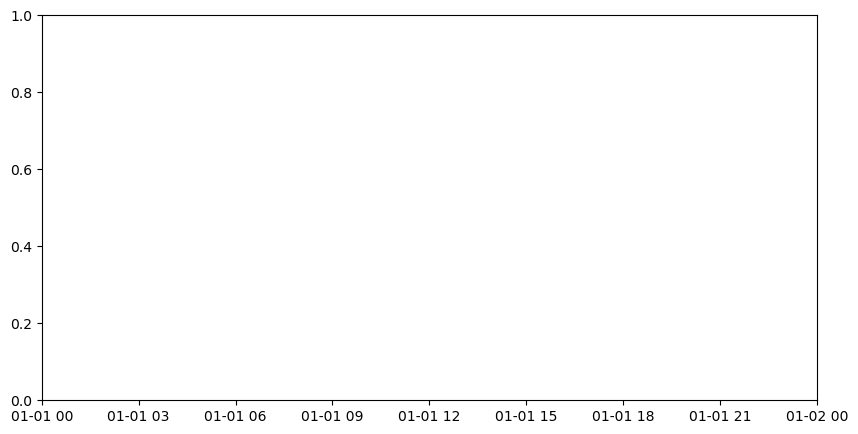

In [ ]:
# # Step 7: Plot the results
# plt.figure(figsize=(10, 5))
# plt.plot(train['ds'], train['y'], label='Train')
# plt.plot(test.index, test['y'], label='Actual')
# plt.plot(predicted.index, predicted['yhat'], label='Forecast')
# plt.title('Sales Forecast vs Actual')
# plt.xlabel('Date')
# plt.ylabel('Sales')
# plt.legend()
# plt.tight_layout()
# plt.show()

In [10]:
df['ds'] = pd.to_datetime(df['ds'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['ds'])


KeyError: 'ds'

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Step 1: Load your data
#df = pd.read_csv('your_file.csv')  # or however you're loading the data
df = pd.read_excel('cleaned_1.xlsx') 
# Step 2: Rename columns to match Prophet format
df.rename(columns={'your_date_column': 'ds', 'your_target_column': 'y'}, inplace=True)

# Step 3: Fix and clean date format
df['ds'] = pd.to_datetime(df['ds'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['ds'])

# Step 4: Train-test split
train = df.iloc[:-30]
test = df.iloc[-30:]

# Step 5: Fit Prophet
model = Prophet()
model.fit(train)

# Step 6: Create future dataframe and forecast
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

# Step 7: Plot
plt.figure(figsize=(10, 5))
plt.plot(train['ds'], train['y'], label='Train')
plt.plot(test['ds'], test['y'], label='Test')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast')
plt.show()


KeyError: 'ds'